In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('titanic.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

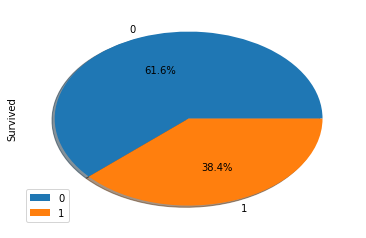

In [109]:
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.legend()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [16]:
data.groupby(['Sex','Survived','Pclass'])['Survived'].count()

Sex     Survived  Pclass
female  0         1           3
                  2           6
                  3          72
        1         1          91
                  2          70
                  3          72
male    0         1          77
                  2          91
                  3         300
        1         1          45
                  2          17
                  3          47
Name: Survived, dtype: int64

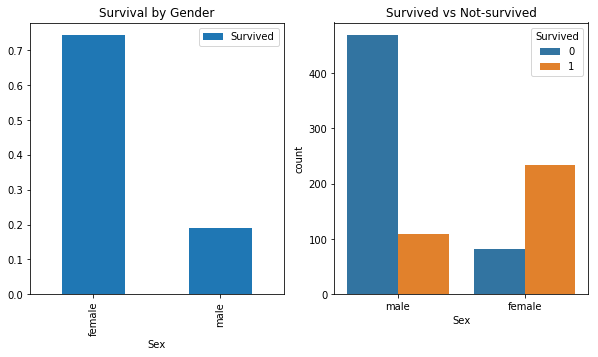

In [125]:
fig, ax=plt.subplots(1,2,figsize=(10,5))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survival by Gender')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title("Survived vs Not-survived")
plt.show()

In [26]:
pd.crosstab(data['Survived'],data['Pclass'],margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


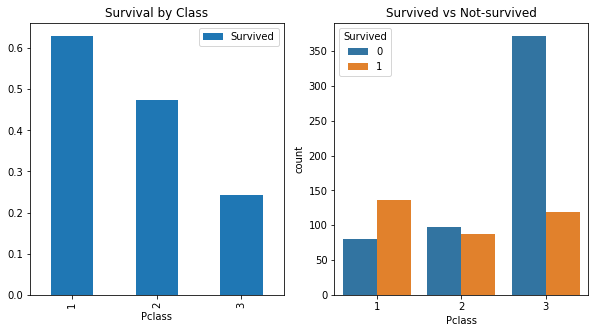

In [27]:
fig, ax=plt.subplots(1,2,figsize=(10,5))
data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survival by Class')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title("Survived vs Not-survived")
plt.show()

In [30]:
pd.crosstab([data['Survived'],data['Pclass']],data['Sex'],margins=True)

Sex              female  male  All
Survived Pclass                   
0        1            3    77   80
         2            6    91   97
         3           72   300  372
1        1           91    45  136
         2           70    17   87
         3           72    47  119
All                 314   577  891

C:\Users\Admin\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


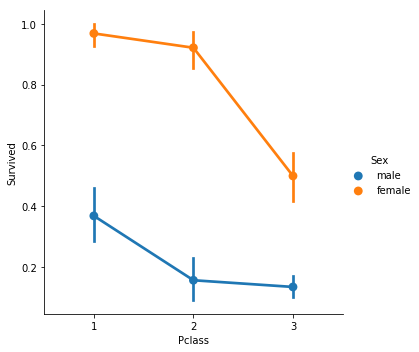

In [31]:
sns.factorplot('Pclass','Survived',hue='Sex', data=data)

In [32]:
data['Age'].mean()

29.69911764705882

In [33]:
data['Age'].min(),data['Age'].max()

(0.42, 80.0)

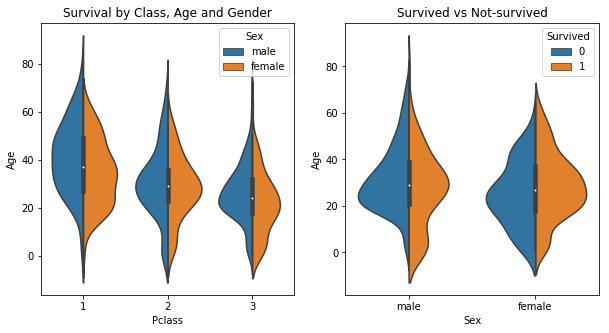

In [41]:
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.violinplot('Pclass','Age',hue='Sex',data=data, split=True,ax=ax[0])
ax[0].set_title('Survival by Class, Age and Gender')
sns.violinplot('Sex','Age',hue='Survived',data=data, split=True,ax=ax[1])
ax[1].set_title("Survived vs Not-survived")
plt.show()

In [42]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
data['Prefix']=0
for i in data:
    data['Prefix']=data['Name'].str.extract('([A-Za-z]+)\.')

In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [58]:
pd.crosstab(data['Prefix'],data['Sex'])

Sex,female,male
Prefix,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [61]:
data['Prefix'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [62]:
pd.crosstab(data['Prefix'],data['Sex'])

Sex,female,male
Prefix,,
Master,0,40
Miss,186,0
Mr,1,528
Mrs,127,0
Other,0,9


In [63]:
data.groupby('Prefix')['Age'].mean()

Prefix
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [67]:
data.loc[(data['Age'].isnull()) & (data.Prefix=='Mr'),'Age']=33
data.loc[(data['Age'].isnull()) & (data.Prefix=='Mrs'),'Age']=36
data.loc[(data['Age'].isnull()) & (data.Prefix=='Miss'),'Age']=22
data.loc[(data['Age'].isnull()) & (data.Prefix=='Master'),'Age']=5
data.loc[(data['Age'].isnull()) & (data.Prefix=='Other'),'Age']=46

In [68]:
data['Age'].isnull().sum()

0

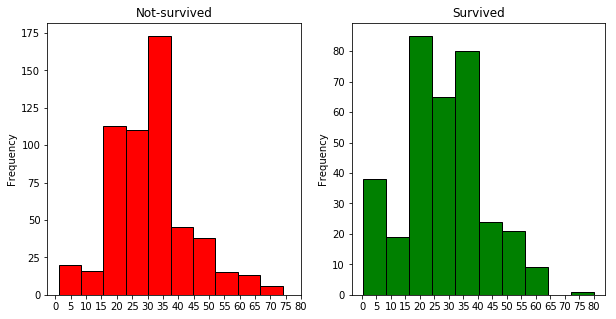

In [71]:
fig, ax=plt.subplots(1,2,figsize=(10,5))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],color='red',edgecolor='black')
ax[0].set_title('Not-survived')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',edgecolor='black')
ax[1].set_title('Survived')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [75]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [78]:
pd.crosstab([data['Embarked'],data['Pclass']],[data['Sex'],data['Survived']],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

Text(0.5,1,'Port of embark by class')

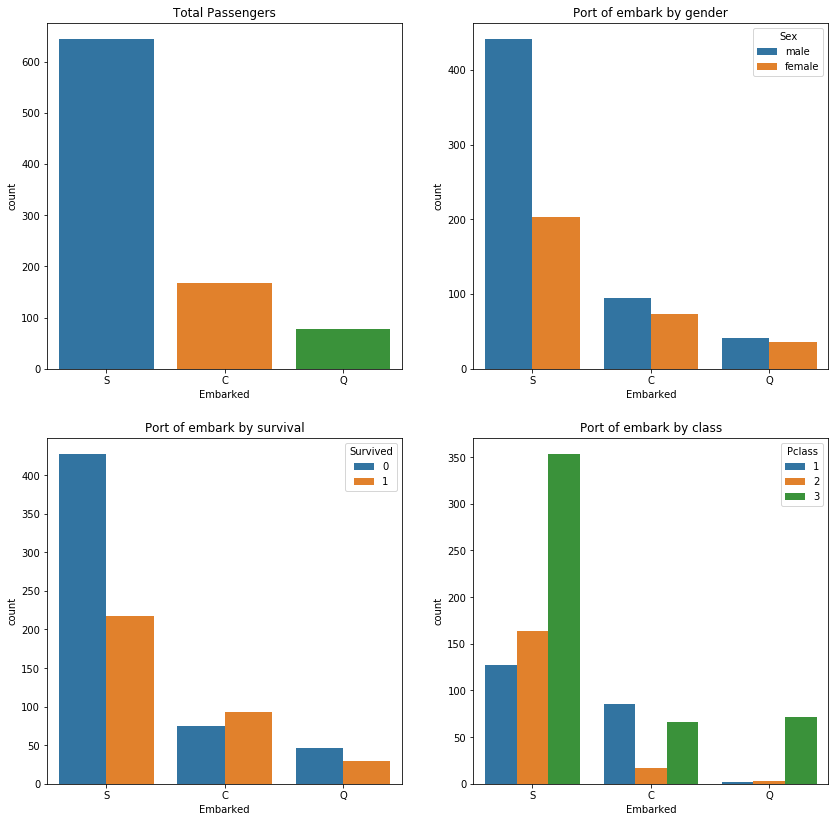

In [84]:
fig, ax=plt.subplots(2,2,figsize=(14,14))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title("Total Passengers")

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title("Port of embark by gender")

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title("Port of embark by survival")

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title("Port of embark by class")

In [85]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Prefix           0
dtype: int64

In [88]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [92]:
pd.crosstab(data['SibSp'],data['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


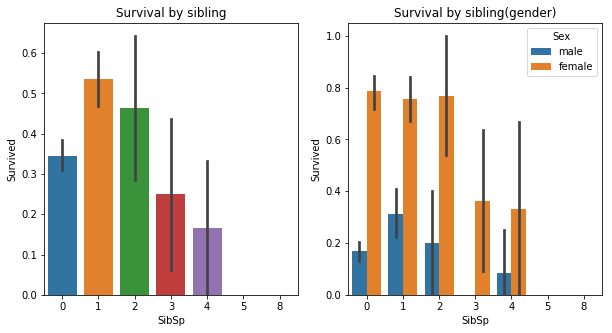

In [99]:
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('Survival by sibling')

sns.barplot('SibSp','Survived',hue='Sex',data=data,ax=ax[1])
ax[1].set_title('Survival by sibling(gender)')
plt.show()

In [100]:
data['Fare'].min(),data['Fare'].max(),data['Fare'].mean(),data['Fare'].median()

(0.0, 512.3292, 32.2042079685746, 14.4542)

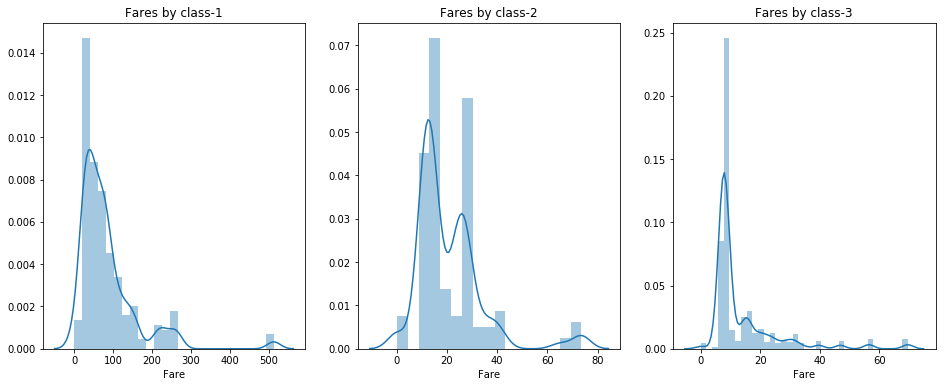

In [108]:
fig, ax=plt.subplots(1,3,figsize=(16,6))
sns.distplot(data[data['Pclass']==1]['Fare'],ax=ax[0])
sns.distplot(data[data['Pclass']==2]['Fare'],ax=ax[1])
sns.distplot(data[data['Pclass']==3]['Fare'],ax=ax[2])
ax[0].set_title('Fares by class-1')
ax[1].set_title('Fares by class-2')
ax[2].set_title('Fares by class-3')

plt.show()

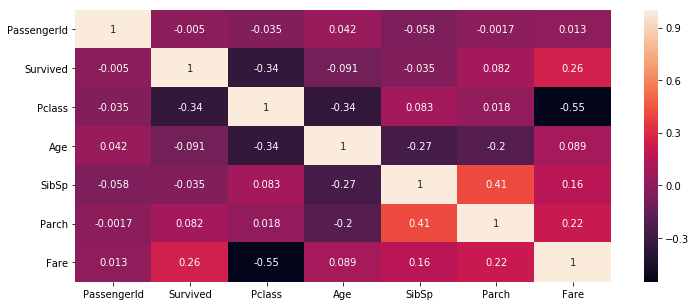

In [116]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True)
plt.show()